In [1]:
#Import everything
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time
import glob
import pandas as pd
import seaborn as sns
import sys
from collections import defaultdict
from tqdm.notebook import tqdm
import matplotlib as mpl






def extract_file_info(d):
    
    #Mapping between levels
    level_dict = {'L1': 'El Nino Static SST. ablco2=6',
                  'L2': 'EC Earth SST. ablco2=6',
                  'L3': 'El Nino Static SST. ablco2=21',
                  'L4': 'EC Earth SST. ablco2=21'
                  }

    #Create some useful labels
    label = d.split('/')[-1]
    level = label.split('_')[1]
    prec = label.split('_')[2]
    rounding = label.split('_')[3]
    title = level_dict[level]
    
    keys = ['label', 'level', 'precision','title']
    values = [label,level,prec+'_'+rounding,title]
    dictionary = {keys[i]: values[i] for i in range(len(keys))}
    
    return dictionary


def extract_file_data(df,columns,weights):
    
    surface = df.sel(pressure=925.0)
        
    data = surface.mean("forecast_period").to_dataframe()[columns]

    return data #This is a pandas df

    
def process_nc_file(fname,weights,directory,true_lat):    
    
        #Get data 
        df = xr.open_dataset(fname)
        
        
        #Reset the latitude
        df = df.assign_coords(latitude=(true_lat))
        

       
        #Get the data you want     
        columns_3d  = ['stlcl_ob']
        data3d = extract_file_data(df,columns_3d,weights)

                
        #Get meta information
        f_info = extract_file_info(directory)
        index = data3d.index
        df_info = pd.DataFrame(f_info,index=index)
      
        #Create pandas df and append
        df_meta = pd.concat([data3d,df_info,],axis=1) 
        
        return df_meta
        
    
        
def process_all_data(all_directories,weights,true_lat):

    
    #Empty arrays to hold data
    dfs = []
    

    for d in tqdm(all_directories): #for every directory
        print ('-----------',d)
        counter = 1
        df_LI = [] # df of solution level i
        nc_files = sorted(glob.glob(d+'/model_output*.nc'))
                
        for n in tqdm(nc_files): #for every model.nc file
            print (n, counter)

            df_meta = process_nc_file(n,weights,d,true_lat)
            df_meta['ID'] = counter #index to show which time period is is from
            print('ID = ', counter)
            df_LI.append(df_meta)
            counter = counter + 1
            
            
        #df_LI = pd.concat(df_LI,ignore_index=True)
        df_LI = pd.concat(df_LI)
        #df_LI['X'] = np.arange(len(df_LI))
        
        #Add append to bigger array
        dfs.append(df_LI)
            
    #Bring all together
    df = pd.concat(dfs)
    
    return df #.reset_index()

    
def get_global_weights(root):
    
     #Get the latitude weights from a special location
    f = root + 'speedyoneLAND_L2_52_RN_m1/model_output00001.nc'
    df = xr.open_dataset(f)
    
    temp_file = df.temperature
    weights = np.cos(np.deg2rad(temp_file.latitude))
         
    weights.name = "weights"
    
    
    return weights, temp_file.latitude
    

def process_node(node):
    
    root= '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/'+node
    
   
    #Get the global weights
    weights,true_lat = get_global_weights(root)
    
    
    
    #iterate over every directory
    all_dirs = glob.glob(root+'speedyone*')     
    df = process_all_data(all_dirs,weights,true_lat)
    
     
    
    return df.reset_index()#.set_index(['latitude', 'longitude', 'ID'])








In [2]:
node = 'paper/LandInterpolation/'
df = process_node(node)

  0%|          | 0/3 [00:00<?, ?it/s]

----------- /network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1


  0%|          | 0/11 [00:00<?, ?it/s]

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1/model_output00001.nc 1
ID =  1
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1/model_output00002.nc 2
ID =  2
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1/model_output00003.nc 3
ID =  3
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1/model_output00004.nc 4
ID =  4
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1/model_output00005.nc 5
ID =  5
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1/model_output00006.nc 6
ID =  6
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_RN_m1/model_output00007.nc 7
ID =  7
/netwo

  0%|          | 0/11 [00:00<?, ?it/s]

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_SR_m1/model_output00001.nc 1
ID =  1
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_SR_m1/model_output00002.nc 2
ID =  2
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_SR_m1/model_output00003.nc 3
ID =  3
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_SR_m1/model_output00004.nc 4
ID =  4
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_SR_m1/model_output00005.nc 5
ID =  5
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_SR_m1/model_output00006.nc 6
ID =  6
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_10_SR_m1/model_output00007.nc 7
ID =  7
/netwo

  0%|          | 0/11 [00:00<?, ?it/s]

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_52_RN_m1/model_output00001.nc 1
ID =  1
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_52_RN_m1/model_output00002.nc 2
ID =  2
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_52_RN_m1/model_output00003.nc 3
ID =  3
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_52_RN_m1/model_output00004.nc 4
ID =  4
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_52_RN_m1/model_output00005.nc 5
ID =  5
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_52_RN_m1/model_output00006.nc 6
ID =  6
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone/paper/LandInterpolation/speedyoneLAND_L2_52_RN_m1/model_output00007.nc 7
ID =  7
/netwo

In [24]:
df.to_pickle('small_data/land_interpolation.pkl')

In [3]:
df = df.set_index(['latitude', 'longitude', 'ID'])

df52 = df.query("precision == '52_RN'")
dfREST = df.query("precision != '52_RN'")

df_pivot = pd.merge(dfREST, df52['stlcl_ob'], left_index=True,right_index=True,suffixes=(None,"_true"))
df_pivot['delta'] = df_pivot['stlcl_ob_true'] - df_pivot['stlcl_ob'] 

df_pivot_averaged = df_pivot.groupby(['latitude', 'longitude','precision']).mean()



In [30]:



from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 
from cartopy.util import add_cyclic_point


def RobinsonPlotDev(df,cmap,lower_limit, upper_limit,nlevs,savefig,show_cbar):
    
    
    
    dftmp = df[['latitude','longitude','delta']].copy() #Make a copy
    dfpivot = dftmp.pivot('longitude', 'latitude') #Pivot onto lon/lat

    #Extract data into arrays
    lat=dfpivot.columns.levels[1].values
    lon=dfpivot.index.values
    data=dfpivot.values.T


    #Setup plotting env
    fig = plt.figure(figsize=[24,12])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    
    
    if (lower_limit is None) & (upper_limit is None):
        levels = nlevs
    else:
        levels = np.linspace(lower_limit,upper_limit,nlevs)
    

    data, lon = add_cyclic_point(data, coord=lon) #https://stackoverflow.com/questions/56348136/white-line-in-contour-plot-in-cartopy-on-center-longitude
    contourf_ = ax.contourf(lon, lat, data,levels=levels,transform=ccrs.PlateCarree(central_longitude=0),cmap=cmap) #this has to be PlateCarree https://stackoverflow.com/questions/56761472/lack-of-projection-for-cartopy-contour
    
    print ('Limits:', min(data.flatten()), max(data.flatten()))
    
    if show_cbar:
        cb = fig.colorbar(contourf_,orientation="horizontal",ax=ax,fraction=0.046, pad=0.04,ticks=[-1, 0, 1])
        cb.ax.tick_params(labelsize=16)
        cb.set_label('K',fontsize=16)
    #tick_params(labelsize=font_size)
    ax.coastlines()
    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)
    
    plt.show()
    
      
def get_data(df,p):
    
    
    df_p = df.query(f'precision == "{p}"').reset_index()
    
    dftmp = df_p[['latitude','longitude','delta']].copy() #Make a copy
    dfpivot = dftmp.pivot('longitude', 'latitude') #Pivot onto lon/lat

    #Extract data into arrays
    lat=dfpivot.columns.levels[1].values
    lon=dfpivot.index.values
    data=dfpivot.values.T
        
    data, lon = add_cyclic_point(data, coord=lon) #https://stackoverflow.com/questions/56348136/white-line-in-contour-plot-in-cartopy-on-center-longitude

    return lon,lat,data
    
        
def RobinsonPlotDevStacked(df,cmap,lower_limit, upper_limit,nlevs,savefig):
    
    
    
   


    #Setup plotting env
    fig = plt.figure(figsize=[24,12])
    
    
    
    ax1 = fig.add_subplot(211, projection=ccrs.Robinson(central_longitude=0)) #RN 
    ax2 = fig.add_subplot(212, projection=ccrs.Robinson(central_longitude=0)) #SR
    
    
    if (lower_limit is None) & (upper_limit is None):
        levels = nlevs
    else:
        levels = np.linspace(lower_limit,upper_limit,nlevs)
        
        
        
    axes = [ax1,ax2]
    precisions = ["10_RN", "10_SR"]
    
    for i in range(len(axes)):
        ax = axes[i]
        p = precisions[i]
    
        lon,lat,data = get_data(df,p)
        contourf_ = ax.contourf(lon, lat, data,levels=levels,transform=ccrs.PlateCarree(central_longitude=0),cmap=cmap) #this has to be PlateCarree https://stackoverflow.com/questions/56761472/lack-of-projection-for-cartopy-contour
        ax.coastlines()

    
    #Add a colorbar to bottom plot
    cb = fig.colorbar(contourf_,orientation="horizontal",ax=ax,fraction=0.046, pad=0.04,ticks=[-1, 0, 1])
    cb.ax.tick_params(labelsize=16)
    cb.set_label('K',fontsize=16)
    
    
    ax1.set_title('Half precision, Round to Nearest')
    ax2.set_title('Half precision, Stochastic Rounding')
    
    fig.subplots_adjust(wspace = 0.1,hspace=0.1)

    #tick_params(labelsize=font_size)
    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)
    
    plt.show()
    
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

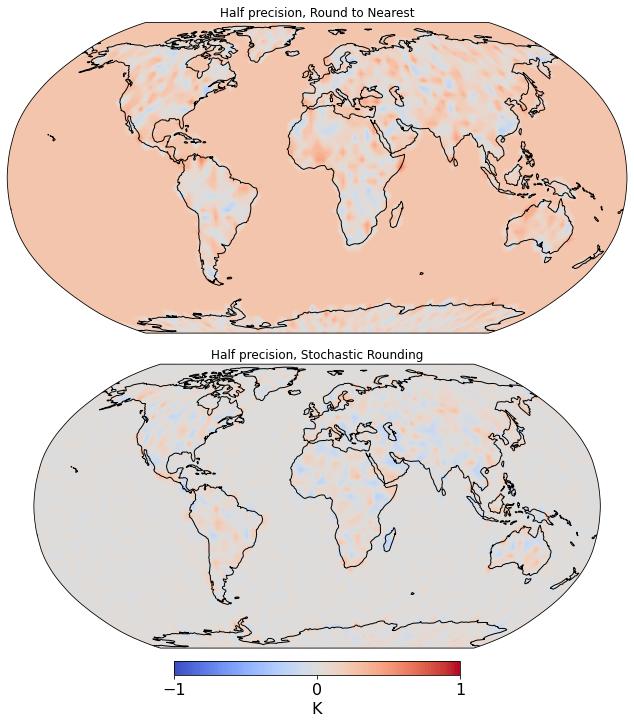

In [32]:
RobinsonPlotDevStacked(df_pivot_averaged,plt.cm.coolwarm,-1, 1,nlevs=100,savefig='figs/land_interpolation.png')

In [5]:
df_pivot_averaged = df_pivot_averaged.reset_index()

In [10]:
RN10 = df_pivot_averaged.query('precision == "10_RN"')

Limits: -0.3989030645615127 0.5784876508700346


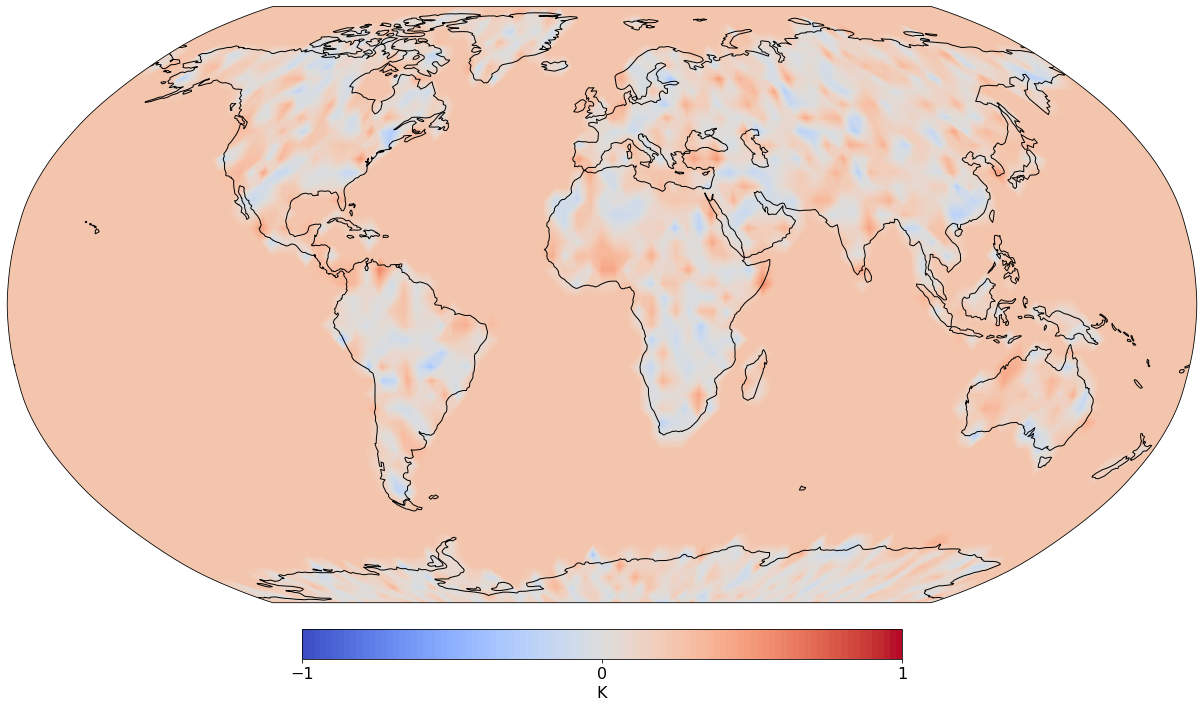

In [26]:
RobinsonPlotDev(RN10,plt.cm.coolwarm,-1, 1,nlevs=100,savefig=None,show_cbar=True)

Limits: -0.3215019188081307 0.3174979888034128


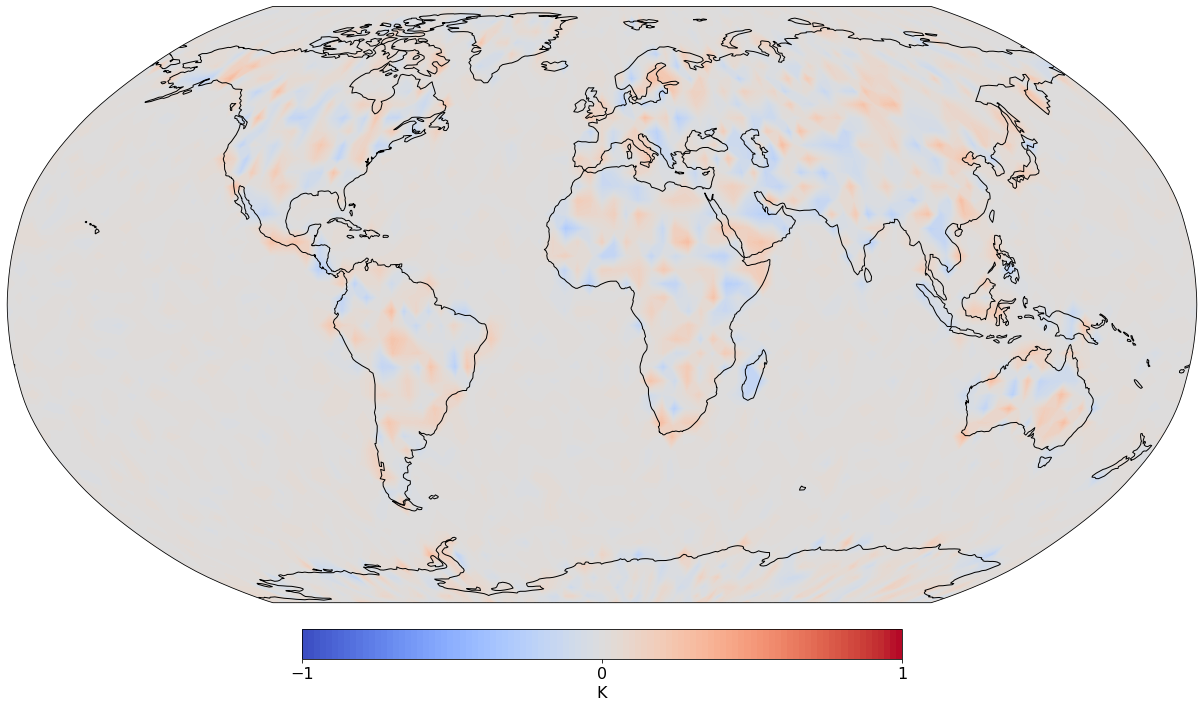

In [25]:
SR10 = df_pivot_averaged.query('precision == "10_SR"')
RobinsonPlotDev(SR10,plt.cm.coolwarm,-1, 1,nlevs=100,savefig=None,show_cbar=True)

In [28]:
SR10.delta.sum()

46.07077566123909

In [29]:
RN10.delta.sum()

841.3590695591265